<h1>ENB41 - RNNs</h1>
<h2>LTSM layers </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


In [2]:
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True

#sess = tf.Session(config=config)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [5]:
net1 = models.Sequential()
net1.add(layers.GRU(240, return_sequences = True, input_shape = (480,6)))
net1.add(layers.GRU(240, return_sequences = True))
net1.add(layers.GRU(240))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 480, 240)          178560    
_________________________________________________________________
gru_1 (GRU)                  (None, 480, 240)          347040    
_________________________________________________________________
gru_2 (GRU)                  (None, 240)               347040    
_________________________________________________________________
dense (Dense)                (None, 7)                 1687      
Total params: 874,327
Trainable params: 874,327
Non-trainable params: 0
_________________________________________________________________


In [6]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [ ]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Epoch 1/100


In [7]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [1.436234   0.78333335]
Standard deviation for loss & accuracy:  [0.34103781 0.02886751]
Duration in seconds:  3943


In [26]:
#net1.save('enb39-1.h5')

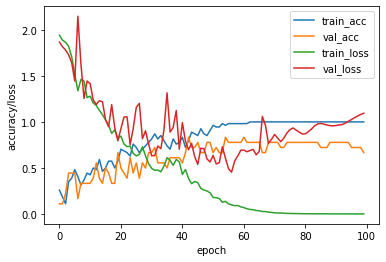

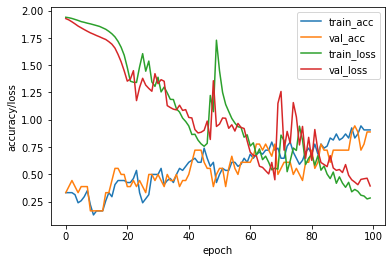

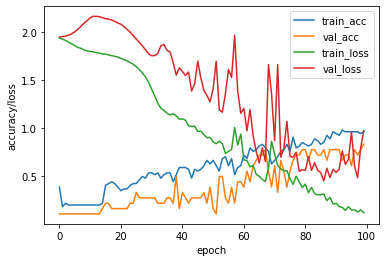

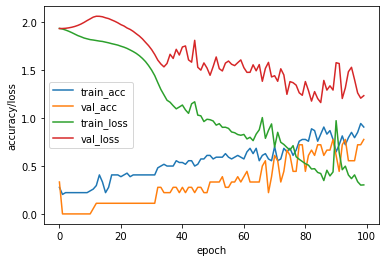

In [8]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [5]:
net2 = models.Sequential()
net2.add(layers.GRU(360, input_shape=(480,6)))
net2.add(layers.Dense(240,  activation = 'relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 360)               397440    
_________________________________________________________________
dense (Dense)                (None, 240)               86640     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1687      
Total params: 485,767
Trainable params: 485,767
Non-trainable params: 0
_________________________________________________________________


In [6]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [ ]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Epoch 1/100


In [18]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [1.05157676 0.63333336]
Standard deviation for loss & accuracy:  [0.16091071 0.07453559]
Duration in seconds:  1358


In [32]:
#net2.save('enb38-2.h5')

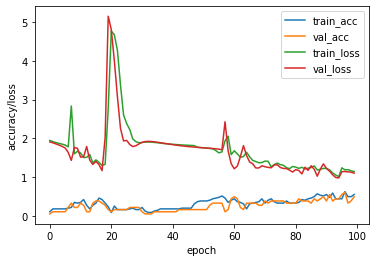

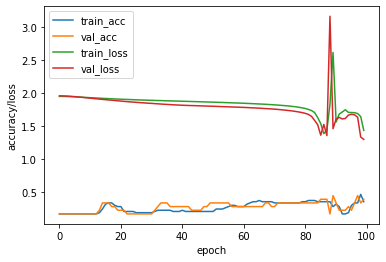

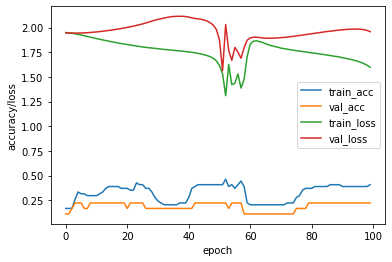

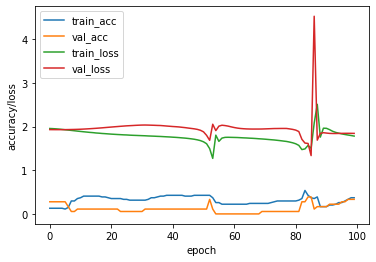

In [33]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [4]:
net3 = models.Sequential()
net3.add(layers.GRU(240, return_sequences = True, input_shape = (480,6)))
net3.add(layers.GRU(240))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 480, 240)          177840    
_________________________________________________________________
gru_2 (GRU)                  (None, 240)               346320    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1687      
Total params: 525,847
Trainable params: 525,847
Non-trainable params: 0
_________________________________________________________________


In [22]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 5s 100ms/step - loss: 1.9496 - accuracy: 0.0185 - val_loss: 1.8888 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 5s 86ms/step - loss: 1.9019 - accuracy: 0.2222 - val_loss: 1.8526 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 5s 86ms/step - loss: 1.8652 - accuracy: 0.1852 - val_loss: 1.8247 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 5s 89ms/step - loss: 1.8393 - accuracy: 0.2407 - val_loss: 1.7915 - val_accuracy: 0.1667
Epoch 5/100
54/54 [==============================] - 5s 87ms/step - loss: 1.8012 - accuracy: 0.3148 - val_loss: 1.7505 - val_accuracy: 0.2222
Epoch 6/100
54/54 [==============================] - 5s 86ms/step - loss: 1.7330 - accuracy: 0.3333 - val_loss: 1.6647 - val_accuracy: 0.2778
Epoch 7/100
54/54 [==============================] - 5s 85ms/step - loss: 1.5885 - accuracy: 0.3704 -

54/54 [==============================] - 5s 97ms/step - loss: 0.7730 - accuracy: 0.6852 - val_loss: 0.9123 - val_accuracy: 0.5000
Epoch 59/100
54/54 [==============================] - 5s 96ms/step - loss: 0.6198 - accuracy: 0.6852 - val_loss: 0.8324 - val_accuracy: 0.5556
Epoch 60/100
54/54 [==============================] - 5s 95ms/step - loss: 0.6489 - accuracy: 0.6852 - val_loss: 0.7041 - val_accuracy: 0.6111
Epoch 61/100
54/54 [==============================] - 5s 96ms/step - loss: 0.5861 - accuracy: 0.7593 - val_loss: 0.7824 - val_accuracy: 0.6111
Epoch 62/100
54/54 [==============================] - 5s 95ms/step - loss: 0.5893 - accuracy: 0.8519 - val_loss: 0.8252 - val_accuracy: 0.5000
Epoch 63/100
54/54 [==============================] - 5s 95ms/step - loss: 0.5521 - accuracy: 0.8704 - val_loss: 0.6493 - val_accuracy: 0.7778
Epoch 64/100
54/54 [==============================] - 5s 95ms/step - loss: 0.5211 - accuracy: 0.8704 - val_loss: 0.5761 - val_accuracy: 0.8333
Epoch 65/100

54/54 [==============================] - 5s 96ms/step - loss: 1.5945 - accuracy: 0.5370 - val_loss: 1.6078 - val_accuracy: 0.4444
Epoch 72/100
54/54 [==============================] - 5s 93ms/step - loss: 1.5657 - accuracy: 0.5000 - val_loss: 1.5898 - val_accuracy: 0.4444
Epoch 73/100
54/54 [==============================] - 5s 94ms/step - loss: 1.5223 - accuracy: 0.5185 - val_loss: 1.5568 - val_accuracy: 0.4444
Epoch 74/100
54/54 [==============================] - 5s 95ms/step - loss: 1.4675 - accuracy: 0.5556 - val_loss: 1.5067 - val_accuracy: 0.4444
Epoch 75/100
54/54 [==============================] - 5s 94ms/step - loss: 1.3933 - accuracy: 0.5000 - val_loss: 1.4570 - val_accuracy: 0.3889
Epoch 76/100
54/54 [==============================] - 5s 93ms/step - loss: 1.3291 - accuracy: 0.4630 - val_loss: 1.4966 - val_accuracy: 0.2222
Epoch 77/100
54/54 [==============================] - 5s 95ms/step - loss: 1.3609 - accuracy: 0.3889 - val_loss: 1.4372 - val_accuracy: 0.2778
Epoch 78/100

54/54 [==============================] - 5s 90ms/step - loss: 0.8092 - accuracy: 0.7407 - val_loss: 1.3263 - val_accuracy: 0.2778
Epoch 85/100
54/54 [==============================] - 5s 93ms/step - loss: 0.8018 - accuracy: 0.7037 - val_loss: 1.5285 - val_accuracy: 0.2778
Epoch 86/100
54/54 [==============================] - 5s 92ms/step - loss: 0.7875 - accuracy: 0.6852 - val_loss: 1.2587 - val_accuracy: 0.2778
Epoch 87/100
54/54 [==============================] - 5s 91ms/step - loss: 0.7390 - accuracy: 0.7963 - val_loss: 1.1115 - val_accuracy: 0.3889
Epoch 88/100
54/54 [==============================] - 5s 91ms/step - loss: 0.7541 - accuracy: 0.8148 - val_loss: 1.0371 - val_accuracy: 0.6111
Epoch 89/100
54/54 [==============================] - 5s 91ms/step - loss: 0.7182 - accuracy: 0.8148 - val_loss: 1.1085 - val_accuracy: 0.4444
Epoch 90/100
54/54 [==============================] - 5s 92ms/step - loss: 0.7035 - accuracy: 0.7222 - val_loss: 1.2283 - val_accuracy: 0.3333
Epoch 91/100

54/54 [==============================] - 5s 90ms/step - loss: 0.6553 - accuracy: 0.6667 - val_loss: 1.1869 - val_accuracy: 0.5556
Epoch 98/100
54/54 [==============================] - 5s 92ms/step - loss: 0.5546 - accuracy: 0.7963 - val_loss: 1.0851 - val_accuracy: 0.5000
Epoch 99/100
54/54 [==============================] - 5s 91ms/step - loss: 0.6593 - accuracy: 0.7037 - val_loss: 1.1026 - val_accuracy: 0.6111
Epoch 100/100
15/15 [==============================] - 0s 23ms/step
[1.4504207372665405, 0.7333333492279053]


In [23]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [1.26070452 0.68333335]
Standard deviation for loss & accuracy:  [0.24019973 0.05527708]
Duration in seconds:  2012


In [37]:
#net3.save('enb38-3.h5')

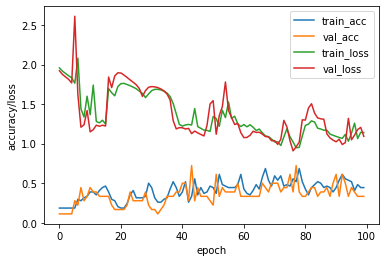

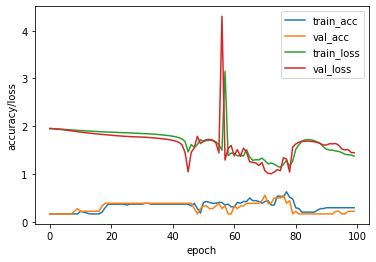

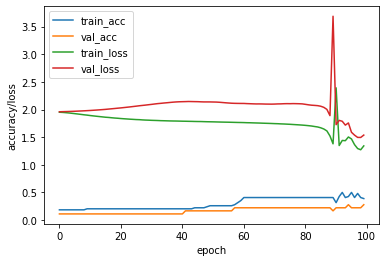

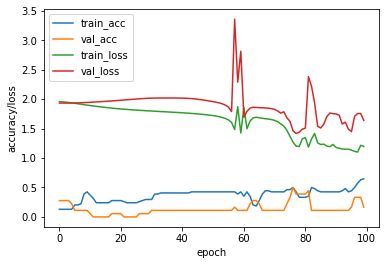

In [38]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [5]:
net4 = models.Sequential()
net4.add(layers.GRU(360, return_sequences = True, input_shape = (480,6)))
net4.add(layers.GRU(360))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 480, 360)          396360    
_________________________________________________________________
gru_4 (GRU)                  (None, 360)               778680    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 2527      
Total params: 1,177,567
Trainable params: 1,177,567
Non-trainable params: 0
_________________________________________________________________


In [6]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 8s 140ms/step - loss: 1.9536 - accuracy: 0.1667 - val_loss: 1.8639 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 7s 139ms/step - loss: 1.8959 - accuracy: 0.1852 - val_loss: 1.8295 - val_accuracy: 0.2222
Epoch 3/100
54/54 [==============================] - 8s 140ms/step - loss: 1.8379 - accuracy: 0.3333 - val_loss: 1.7584 - val_accuracy: 0.3333
Epoch 4/100
54/54 [==============================] - 8s 148ms/step - loss: 1.7918 - accuracy: 0.3333 - val_loss: 1.6751 - val_accuracy: 0.3889
Epoch 5/100
54/54 [==============================] - 8s 144ms/step - loss: 1.6642 - accuracy: 0.3704 - val_loss: 1.5753 - val_accuracy: 0.3889
Epoch 6/100
54/54 [==============================] - 8s 143ms/step - loss: 1.4992 - accuracy: 0.3704 - val_loss: 1.3321 - val_accuracy: 0.3889
Epoch 7/100
54/54 [==============================] - 8s 143ms/step - loss: 1.4540 - accuracy: 0

54/54 [==============================] - 9s 160ms/step - loss: 0.8384 - accuracy: 0.6296 - val_loss: 0.9753 - val_accuracy: 0.4444
Epoch 57/100
54/54 [==============================] - 9s 160ms/step - loss: 0.8712 - accuracy: 0.5926 - val_loss: 0.9802 - val_accuracy: 0.3889
Epoch 58/100
54/54 [==============================] - 9s 160ms/step - loss: 0.8348 - accuracy: 0.5926 - val_loss: 0.8828 - val_accuracy: 0.5556
Epoch 59/100
54/54 [==============================] - 9s 160ms/step - loss: 0.6996 - accuracy: 0.7963 - val_loss: 0.9468 - val_accuracy: 0.4444
Epoch 60/100
54/54 [==============================] - 9s 162ms/step - loss: 0.7516 - accuracy: 0.6481 - val_loss: 0.8537 - val_accuracy: 0.6667
Epoch 61/100
54/54 [==============================] - 9s 162ms/step - loss: 0.7630 - accuracy: 0.6296 - val_loss: 1.0546 - val_accuracy: 0.4444
Epoch 62/100
54/54 [==============================] - 9s 163ms/step - loss: 0.8435 - accuracy: 0.5556 - val_loss: 0.9843 - val_accuracy: 0.4444
Epoch

54/54 [==============================] - 9s 176ms/step - loss: 1.8495 - accuracy: 0.3519 - val_loss: 1.7291 - val_accuracy: 0.3889
Epoch 13/100
54/54 [==============================] - 10s 177ms/step - loss: 1.8413 - accuracy: 0.3519 - val_loss: 1.7206 - val_accuracy: 0.3889
Epoch 14/100
54/54 [==============================] - 9s 176ms/step - loss: 1.8321 - accuracy: 0.3519 - val_loss: 1.7135 - val_accuracy: 0.3889
Epoch 15/100
54/54 [==============================] - 9s 175ms/step - loss: 1.8228 - accuracy: 0.3519 - val_loss: 1.7092 - val_accuracy: 0.3333
Epoch 16/100
54/54 [==============================] - 10s 177ms/step - loss: 1.8147 - accuracy: 0.3704 - val_loss: 1.7064 - val_accuracy: 0.3333
Epoch 17/100
54/54 [==============================] - 9s 175ms/step - loss: 1.8036 - accuracy: 0.3333 - val_loss: 1.7001 - val_accuracy: 0.3333
Epoch 18/100
54/54 [==============================] - 10s 176ms/step - loss: 1.7931 - accuracy: 0.3519 - val_loss: 1.6919 - val_accuracy: 0.3333
Ep

Epoch 69/100
54/54 [==============================] - 10s 179ms/step - loss: 0.9419 - accuracy: 0.7222 - val_loss: 1.0628 - val_accuracy: 0.5000
Epoch 70/100
54/54 [==============================] - 10s 179ms/step - loss: 0.9436 - accuracy: 0.7037 - val_loss: 0.9952 - val_accuracy: 0.6111
Epoch 71/100
54/54 [==============================] - 10s 181ms/step - loss: 0.8708 - accuracy: 0.7593 - val_loss: 0.9935 - val_accuracy: 0.5000
Epoch 72/100
54/54 [==============================] - 10s 180ms/step - loss: 0.8849 - accuracy: 0.6852 - val_loss: 1.0025 - val_accuracy: 0.6111
Epoch 73/100
54/54 [==============================] - 10s 180ms/step - loss: 0.8451 - accuracy: 0.7778 - val_loss: 0.9997 - val_accuracy: 0.5556
Epoch 74/100
54/54 [==============================] - 10s 180ms/step - loss: 0.8413 - accuracy: 0.6852 - val_loss: 0.8260 - val_accuracy: 0.6667
Epoch 75/100
54/54 [==============================] - 10s 180ms/step - loss: 0.7919 - accuracy: 0.7222 - val_loss: 0.8143 - val_ac

54/54 [==============================] - 10s 185ms/step - loss: 1.6674 - accuracy: 0.3704 - val_loss: 1.9682 - val_accuracy: 0.2222
Epoch 25/100
54/54 [==============================] - 10s 185ms/step - loss: 1.6537 - accuracy: 0.3704 - val_loss: 1.9521 - val_accuracy: 0.3333
Epoch 26/100
54/54 [==============================] - 10s 183ms/step - loss: 1.6413 - accuracy: 0.4444 - val_loss: 1.9331 - val_accuracy: 0.2778
Epoch 27/100
54/54 [==============================] - 10s 184ms/step - loss: 1.6237 - accuracy: 0.4815 - val_loss: 1.9118 - val_accuracy: 0.2778
Epoch 28/100
54/54 [==============================] - 10s 184ms/step - loss: 1.6055 - accuracy: 0.5000 - val_loss: 1.8950 - val_accuracy: 0.2778
Epoch 29/100
54/54 [==============================] - 10s 183ms/step - loss: 1.5856 - accuracy: 0.5185 - val_loss: 1.8773 - val_accuracy: 0.2778
Epoch 30/100
54/54 [==============================] - 10s 184ms/step - loss: 1.5630 - accuracy: 0.5370 - val_loss: 1.8612 - val_accuracy: 0.277

54/54 [==============================] - 10s 187ms/step - loss: 0.8673 - accuracy: 0.7037 - val_loss: 0.8334 - val_accuracy: 0.6667
Epoch 81/100
54/54 [==============================] - 10s 187ms/step - loss: 0.6959 - accuracy: 0.6852 - val_loss: 1.1443 - val_accuracy: 0.4444
Epoch 82/100
54/54 [==============================] - 10s 187ms/step - loss: 0.7514 - accuracy: 0.6481 - val_loss: 0.8151 - val_accuracy: 0.6667
Epoch 83/100
54/54 [==============================] - 10s 185ms/step - loss: 0.6270 - accuracy: 0.7037 - val_loss: 0.8419 - val_accuracy: 0.6667
Epoch 84/100
54/54 [==============================] - 10s 188ms/step - loss: 0.6685 - accuracy: 0.7407 - val_loss: 0.9723 - val_accuracy: 0.5556
Epoch 85/100
54/54 [==============================] - 10s 186ms/step - loss: 0.6495 - accuracy: 0.7222 - val_loss: 0.8556 - val_accuracy: 0.6111
Epoch 86/100
54/54 [==============================] - 10s 187ms/step - loss: 0.5322 - accuracy: 0.7593 - val_loss: 0.8391 - val_accuracy: 0.666

Epoch 36/100
54/54 [==============================] - 10s 191ms/step - loss: 1.2995 - accuracy: 0.4074 - val_loss: 1.6787 - val_accuracy: 0.1111
Epoch 37/100
54/54 [==============================] - 10s 190ms/step - loss: 1.2385 - accuracy: 0.4259 - val_loss: 1.6771 - val_accuracy: 0.1111
Epoch 38/100
54/54 [==============================] - 10s 188ms/step - loss: 1.1941 - accuracy: 0.4259 - val_loss: 1.6462 - val_accuracy: 0.1111
Epoch 39/100
54/54 [==============================] - 10s 189ms/step - loss: 1.1350 - accuracy: 0.4630 - val_loss: 1.4486 - val_accuracy: 0.0556
Epoch 40/100
54/54 [==============================] - 10s 190ms/step - loss: 1.1424 - accuracy: 0.3704 - val_loss: 1.4684 - val_accuracy: 0.1667
Epoch 41/100
54/54 [==============================] - 10s 188ms/step - loss: 1.1311 - accuracy: 0.3889 - val_loss: 1.4024 - val_accuracy: 0.1667
Epoch 42/100
54/54 [==============================] - 10s 188ms/step - loss: 1.1111 - accuracy: 0.3889 - val_loss: 1.4358 - val_ac

54/54 [==============================] - 10s 188ms/step - loss: 0.8233 - accuracy: 0.6111 - val_loss: 1.2461 - val_accuracy: 0.5556
Epoch 93/100
54/54 [==============================] - 10s 193ms/step - loss: 0.6300 - accuracy: 0.7037 - val_loss: 1.0876 - val_accuracy: 0.5556
Epoch 94/100
54/54 [==============================] - 10s 192ms/step - loss: 0.5642 - accuracy: 0.7593 - val_loss: 1.1465 - val_accuracy: 0.5000
Epoch 95/100
54/54 [==============================] - 10s 190ms/step - loss: 0.6329 - accuracy: 0.7037 - val_loss: 1.1434 - val_accuracy: 0.5556
Epoch 96/100
54/54 [==============================] - 10s 189ms/step - loss: 0.5466 - accuracy: 0.7407 - val_loss: 1.1339 - val_accuracy: 0.5556
Epoch 97/100
54/54 [==============================] - 10s 190ms/step - loss: 0.5613 - accuracy: 0.7222 - val_loss: 1.1753 - val_accuracy: 0.5556
Epoch 98/100
54/54 [==============================] - 10s 191ms/step - loss: 0.5281 - accuracy: 0.7778 - val_loss: 1.2176 - val_accuracy: 0.555

In [7]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.93163492 0.71666668]
Standard deviation for loss & accuracy:  [0.13345459 0.05527708]
Duration in seconds:  3849


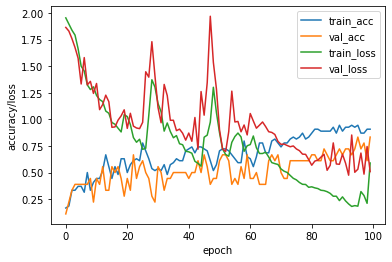

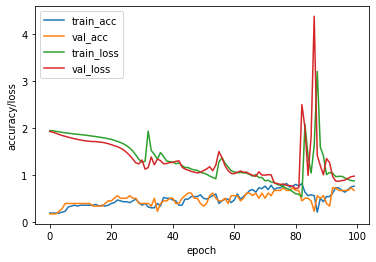

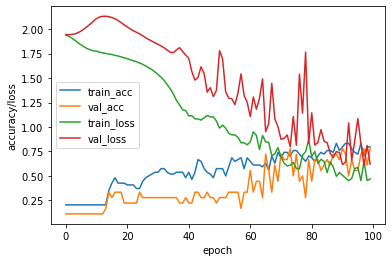

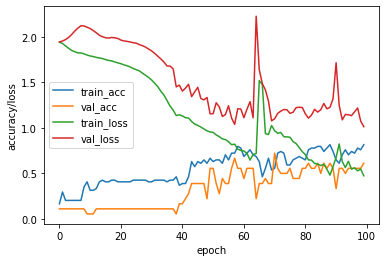

In [8]:
for history in histories4:
    pp.plot_hist(history)

In [14]:
#net4.save('enb38-4.h5')

<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
